# Step 0 of 5: Import necessary modules

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

# Step 1 of 6: Learn Database

In [4]:
boston = datasets.load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Step 2 of 6: Extract data in X and y variable

In [13]:
# Step 2 of 5: Extract data in X and y variable
X=boston.data
y=boston.target

# Step 3 of 6: Create training and test sets

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Step 4 of 6: Create Model

In [16]:
# Create the regressor: reg_all
reg_all=LinearRegression()

In [17]:
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Step 5 of 6: Predict using model

In [18]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Step 6 of 6: Test the Performance

In [19]:
# Compute and print R^2 # it shoud be near to one
print("R^2: {}".format(r2_score(y_test,y_pred)))

R^2: 0.7112260057484925


In [20]:
# Compute and print RMSE # it should be smaller than standard deviation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
std = np.std(y_test)
print("Standard Deviation σ : {}".format(std))
rmse <std # For good model #it must be true

Root Mean Squared Error: 4.638689926172827
Standard Deviation σ : 8.632096823360303


True

# Cross validation
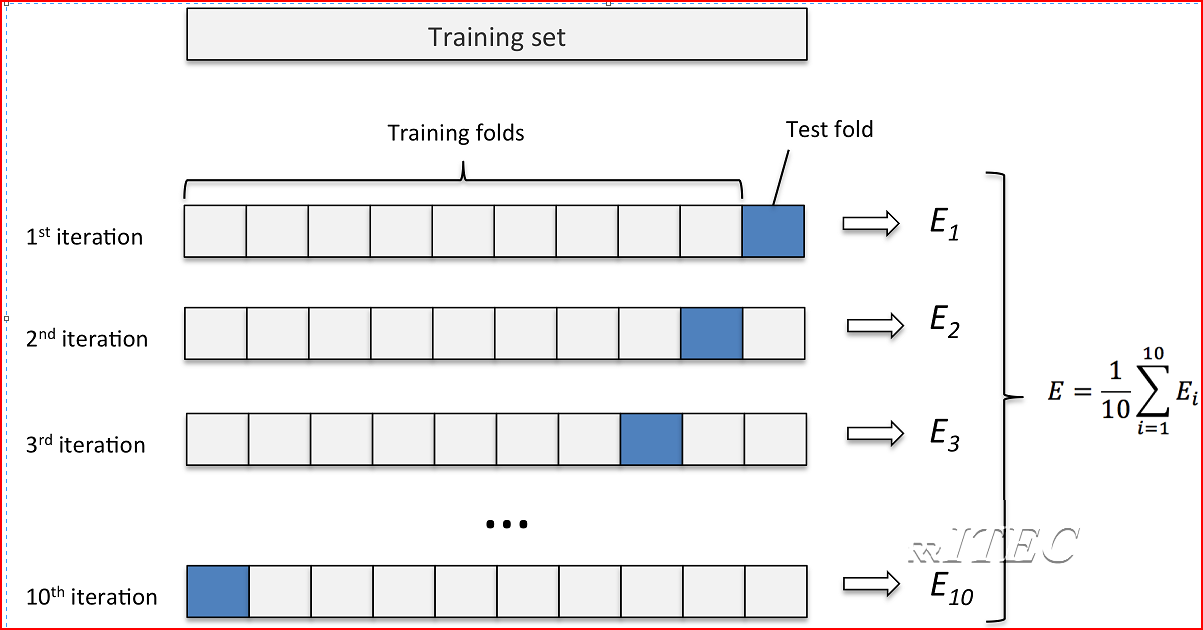

In [23]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

In [36]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X, y, cv=5)
# Print the 5-fold cross-validation scores
print(cv_scores)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [37]:
# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.353275924395884
